In [1]:
# %%
import os
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro, monte_carlo_test
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from stats_test import shapiro_test
path = os.path.join(os.getcwd(), 'datasets','Birthweight.csv')
dataset = pd.read_csv(path, sep=',', decimal='.')

dataset.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [3]:
dataset['ID'] = dataset['ID'].astype(object)

In [5]:
dataset.describe()

,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,51.333333,3.312857,34.595238,39.190476,0.523810,25.547619,9.428571,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238
std,2.935624,0.603895,2.399792,2.643336,0.505487,5.666342,12.511737,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102
min,43.000000,1.920000,30.000000,33.000000,0.000000,18.000000,0.000000,149.000000,45.000000,19.000000,10.000000,0.000000,169.000000,0.000000,0.000000
25%,50.000000,2.940000,33.000000,38.000000,0.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000
50%,52.000000,3.295000,34.000000,39.500000,1.000000,24.000000,4.500000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000
75%,53.000000,3.647500,36.000000,41.000000,1.000000,29.000000,15.750000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000
max,58.000000,4.570000,39.000000,45.000000,1.000000,41.000000,50.000000,181.000000,78.000000,46.000000,16.000000,50.000000,200.000000,1.000000,1.000000


In [7]:
'''
Q1. What is the mean father’s age?
'''
fathers = dataset['fage']
mean = fathers.mean()

print(f"Mean is {mean:.3f} years")

Mean is 28.905


In [13]:
'''
Q2. What is the mean father’s age for low birthweight babies?
'''
m = dataset[dataset['lowbwt']==1]['fage'].mean()

print(f"Mean is {m:.3f} years")


Mean is 24.833 years


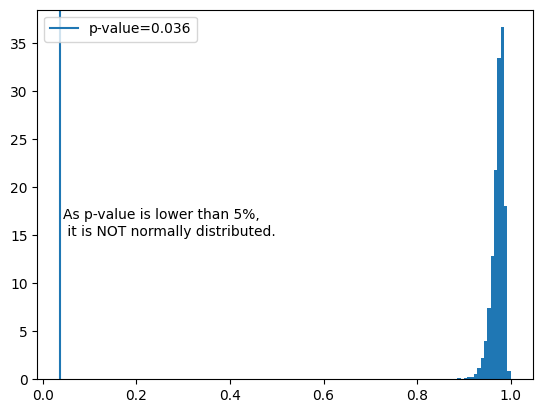

In [10]:
'''
Q3. Is the father's age normally distributed? Justify your answer.
'''
shapiro_test(dataset['fage'])


In [11]:
'''
Q4. If you apply the log transformation to the father's age, what is the mean score of the transformed variable?
'''
log_strans = np.log(dataset['fage'])
log_strans.mean()


np.float64(3.3370421189026085)

In [12]:
'''
Q5. Is the above mean score a good representation of the real value? Justify your answer.
'''
print('''The mean score of the log-transformed variable (3.33) is not a direct 
      representation of the real value in the original scale. However, 
      it provides valuable information about the distribution and central tendency of the data after transformation.''')

The mean score of the log-transformed variable (3.33) is not a direct 
      representation of the real value in the original scale. However, 
      it provides valuable information about the distribution and central tendency of the data after transformation.


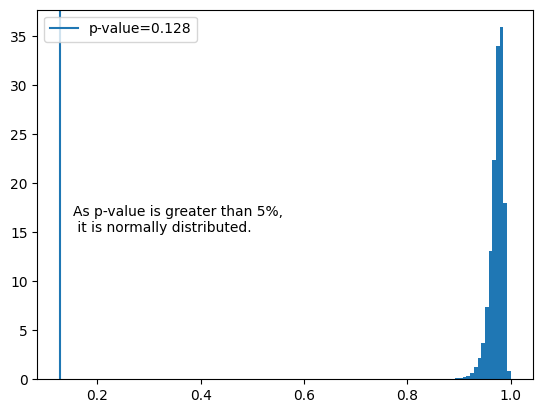

In [13]:
'''
Q6. Is the new variable (log transform of father’s age) normally distributed? Justify your answer.
'''
shapiro_test(np.log(dataset['fage']))

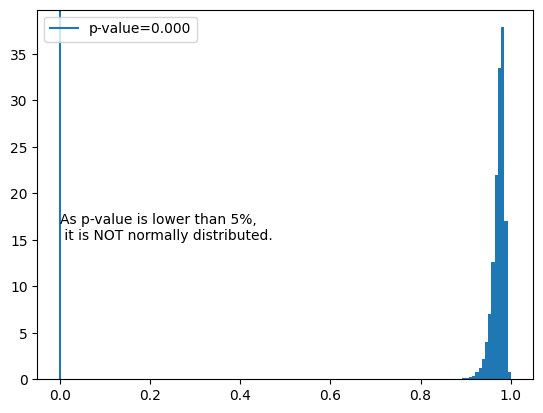

In [14]:
'''
Q7. Is the variable “years father was in education” normally distributed? 
'''
shapiro_test(dataset['fedyrs'])

In [ ]:
'''
Q8. Mentioning the null and alternative hypotheses, explain the above answer. 
'''
print('''The Shapiro-Wilk test tests the null hypothesis that the data are drawn from a normal distribution. 
Therefore, with a p-value below 0.05, we reject the null hypothesis and conclude that the data are not normally distributed.''')

In [15]:
'''
Q9. What is the mean score for the variable “years father was in education” after you apply the Box-Cox transformation?
'''
log_trans = np.log(dataset['fedyrs'])
log_trans.mean()

np.float64(2.6019771075049722)

<Axes: xlabel='log_fedyrs', ylabel='Count'>

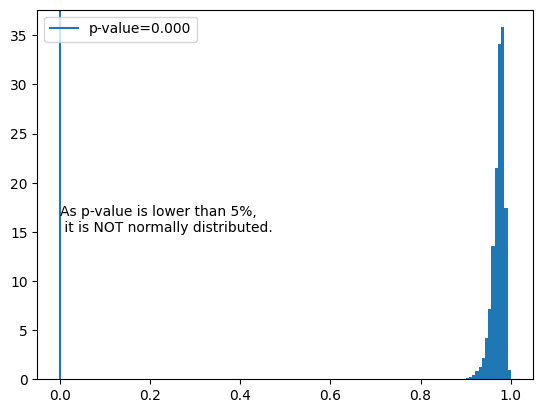

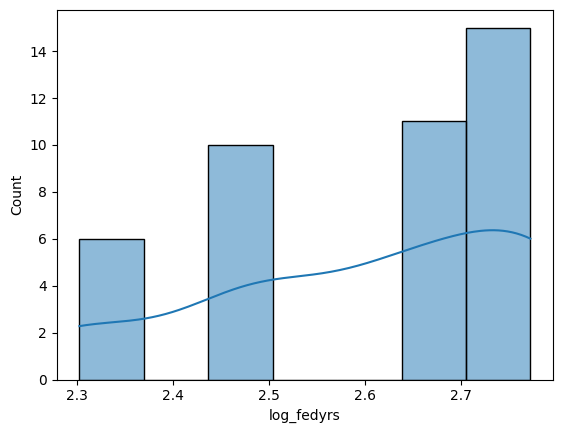

In [19]:
'''
Q10. Is this new variable normally distributed? Explain.
'''

shapiro_test(np.log(dataset['fedyrs']))
dataset['log_fedyrs'] = np.log(dataset['fedyrs'])

fig, ax = plt.subplots()
sns.histplot(dataset, x='log_fedyrs', ax=ax, kde=True)